<a href="https://colab.research.google.com/github/ruoroj/ProjectWeekPractice/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from spacy.lang.en import English
nlp = English()
import spacy
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [89]:
df = pd.read_csv('/content/MentalHealth_orig (1).csv')
df.head(1)

,Unnamed: 0,tweet,location,disorder,hour,clean_tweet
0,0,shock as a young man climbs on top of a hospit...,"nairobi, kenya",4,10,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [90]:
df.drop(['Unnamed: 0','tweet','location', 'hour'],axis=1,inplace=True)

In [91]:
#removing url links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['clean_tweet']=df['clean_tweet'].apply(lambda x : remove_URL(x))

In [92]:
df.head(1)

,disorder,clean_tweet
0,4,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [93]:
df.to_csv('clean.csv')

In [94]:
!pip install keras
!pip install tensorflow

In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import sequence
from __future__ import absolute_import,division,print_function,unicode_literals
import nltk
from nltk.corpus import stopwords

from numpy import array

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import tensorflow_hub as hub

In [97]:
#Split between the test and train data
X_train,X_test = train_test_split(df, test_size = 0.2, random_state = 1000)
X_train.shape,X_test.shape

((604, 2), (152, 2))

In [98]:
#Dealing with class imbalance using weights
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced', np.unique(df['disorder']),df['disorder']))
class_weights

[0.33992805755395683,
 6.75,
 5.5588235294117645,
 7.875,
 0.26770538243626063,
 10.5,
 6.75,
 1.6016949152542372]

In [99]:
clean = pd.read_csv('/content/clean.csv')
clean.head(1)

,Unnamed: 0,disorder,clean_tweet
0,0,4,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
cv = CountVectorizer(stop_words='english')
rt = cv.fit_transform(clean['clean_tweet'])
clean.drop('clean_tweet',axis=1,inplace=True)
rt = pd.DataFrame(rt.toarray())
df = pd.concat([clean,rt],axis=1)
df.head(1)

,Unnamed: 0,disorder,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296,3297,3298,3299,3300
0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
df.columns

Index(['Unnamed: 0',   'disorder',            0,            1,            2,
                  3,            4,            5,            6,            7,
       ...
               3291,         3292,         3293,         3294,         3295,
               3296,         3297,         3298,         3299,         3300],
      dtype='object', length=3303)

In [102]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(1)

,disorder,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296,3297,3298,3299,3300
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
X = df.drop('disorder',axis=1)
y = df['disorder']

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=101)

In [105]:
#Turn the weights into a dictionary
weights={}
for index, weight in enumerate(class_weights):
  weights[index]=weight

In [ ]:
#Set the data as a tensor


In [106]:
#Create an embedding layer using a pretrained model
embedding='https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1'
hub_layer=hub.KerasLayer(embedding,output_shape=[128],input_shape=[],
                        dtype=tf.string,trainable=True)

In [107]:
#Build a keras sequential model
input_dim = len(df.columns) - 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim = input_dim , activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'softmax'))

In [108]:
# We compile using adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [109]:
#Model training

history=model.fit(X_train,
                  y_train,
                  validation_data = (X_val, y_val),
                  epochs = 10,batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 2.0611 - accuracy: 0.4305 - val_loss: 2.0384 - val_accuracy: 0.4803
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 2.0204 - accuracy: 0.4636 - val_loss: 1.9985 - val_accuracy: 0.4803
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 1.9762 - accuracy: 0.4636 - val_loss: 1.9488 - val_accuracy: 0.4803
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 1.8875 - accuracy: 0.4636 - val_loss: 1.8484 - val_accuracy: 0.4803
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 1.6974 - accuracy: 0.4685 - val_loss: 1.6778 - val_accuracy: 0.4803
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 1.4351 - accuracy: 0.6805 - val_loss: 1.5008 - val_accuracy: 0.5921
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 1.2419 - accuracy: 0.7334 - val_loss: 1.3760 - val_accuracy: 0.5987
Epoch 8/10
38/38 [==

In [110]:
X_train.shape

(604, 3301)

In [111]:
import matplotlib.pyplot as plt


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


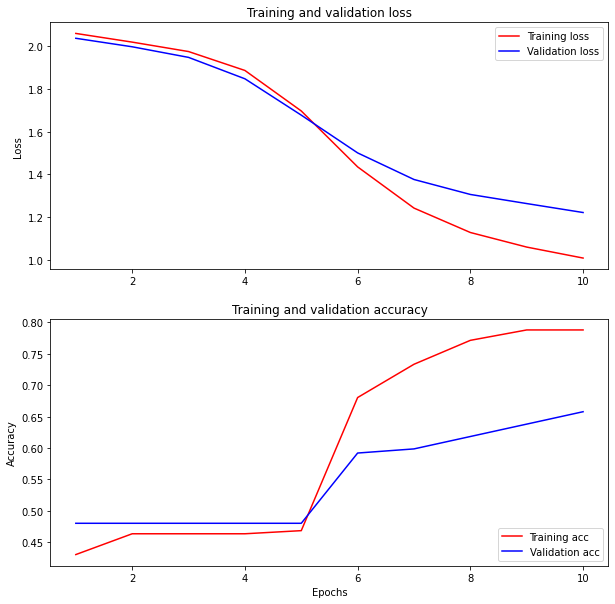

In [112]:
#plot of model perfomance

history_dict = history.history
print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [113]:
#Build a keras sequential model
input_dim = len(df.columns) - 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'softmax'))

In [114]:
# We compile using adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [115]:
#Model training

history=model.fit(X_train,y_train,
                  validation_data = (X_val, y_val),
                  epochs = 10,batch_size=5)

Epoch 1/10
121/121 [==============================] - 1s 4ms/step - loss: 1.9289 - accuracy: 0.4338 - val_loss: 1.6241 - val_accuracy: 0.5066
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: 1.3229 - accuracy: 0.4404 - val_loss: 1.1122 - val_accuracy: 0.4803
Epoch 3/10
121/121 [==============================] - 0s 2ms/step - loss: 1.0242 - accuracy: 0.4983 - val_loss: 0.8502 - val_accuracy: 0.7237
Epoch 4/10
121/121 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7533 - val_loss: 0.6956 - val_accuracy: 0.7237
Epoch 5/10
121/121 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8295 - val_loss: 0.6669 - val_accuracy: 0.7697
Epoch 6/10
121/121 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8477 - val_loss: 0.6558 - val_accuracy: 0.7829
Epoch 7/10
121/121 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8576 - val_loss: 0.6486 - val_accuracy: 0.7829
Epoch 

In [116]:
y_pred =model.predict(X_test)


In [121]:
y_pred

array([[1.15043437e-02, 3.52382835e-06, 1.13346934e-04, ...,
        4.12380223e-06, 3.64097809e-06, 1.14426799e-02],
       [1.29097491e-03, 7.10622459e-08, 1.13510814e-05, ...,
        8.26174968e-08, 8.29595166e-08, 4.21773829e-03],
       [8.17750633e-01, 1.91811068e-05, 5.53202699e-05, ...,
        7.24771598e-05, 2.84157741e-05, 2.20007496e-03],
       ...,
       [1.98049331e-03, 4.00797126e-06, 2.67027703e-04, ...,
        2.93190328e-06, 4.15185832e-06, 2.39165165e-02],
       [9.42708850e-01, 1.95179873e-05, 2.35499028e-05, ...,
        8.35249448e-05, 2.53296039e-05, 7.05097686e-04],
       [9.77549553e-01, 2.50082303e-06, 2.63538163e-06, ...,
        1.59211031e-05, 3.53466521e-06, 1.32646193e-04]], dtype=float32)

In [117]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_eval, y_pred))


ValueError: ignored

In [88]:
# y_pred.dtype, y_eval.shape, y_test.shape, y_val.shape
y_pred

array([[3.5909414e-02, 5.8310448e-08, 7.7193975e-04, ..., 4.4212666e-05,
        4.5883628e-03, 9.1839564e-04],
       [8.3052646e-04, 1.5152814e-12, 9.7818975e-06, ..., 6.1095207e-08,
        5.6471163e-04, 1.2410103e-06],
       [7.1760046e-01, 1.2189383e-07, 5.3960513e-05, ..., 8.7646469e-05,
        4.3374537e-05, 5.3330460e-03],
       ...,
       [3.4213534e-03, 3.1906167e-09, 5.8699405e-04, ..., 5.6556114e-06,
        1.0270215e-02, 7.7448967e-05],
       [9.8758799e-01, 2.4780823e-07, 2.2588461e-06, ..., 5.0013736e-05,
        2.4937884e-07, 4.7305296e-03],
       [9.8187178e-01, 2.9193753e-08, 1.3587043e-06, ..., 1.8725985e-05,
        2.2493008e-07, 2.9875140e-03]], dtype=float32)

In [43]:
# y_test.dtype

dtype('int64')

In [ ]:
# y_pred = y_pred.astype('int64')

In [ ]:
# y_pred.dtype

dtype('int64')

In [ ]:
import pandas as pd


In [ ]:
# y_pred.dtype

dtype('int64')

In [45]:
# y_train.dtype

ValueError: ignored